# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from tqdm.auto import tqdm
tqdm.pandas()

pd.options.display.max_colwidth = None

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('E:/Scrapped-Data/InshortsScraped.csv')
print(data.shape)
data.head()

(52632, 8)


,news,national,sports,world,politics,technology,entertainment,hatke
0,"""Modi Modi yes papa,"" Rashtriya Janata Dal pens poem on PM Modi",0,0,0,1,0,0,0
1,"""Powerphone"" Galaxy Note20 Ultra 5G to launch at Powerfest on 25 Aug",0,0,0,0,1,0,0
2,"""Powerphones"" - Samsung Galaxy Note20 | 20 Ultra 5G launched in India",0,0,0,0,1,0,0
3,#ACKOCatchTheLogo contest starts tomorrow,0,0,0,0,0,0,0
4,"#AyodhyaVerdict becomes world's top Twitter trend with over 630,000 tweets",1,0,1,0,1,0,0


# EDA

## News Categories and their counts

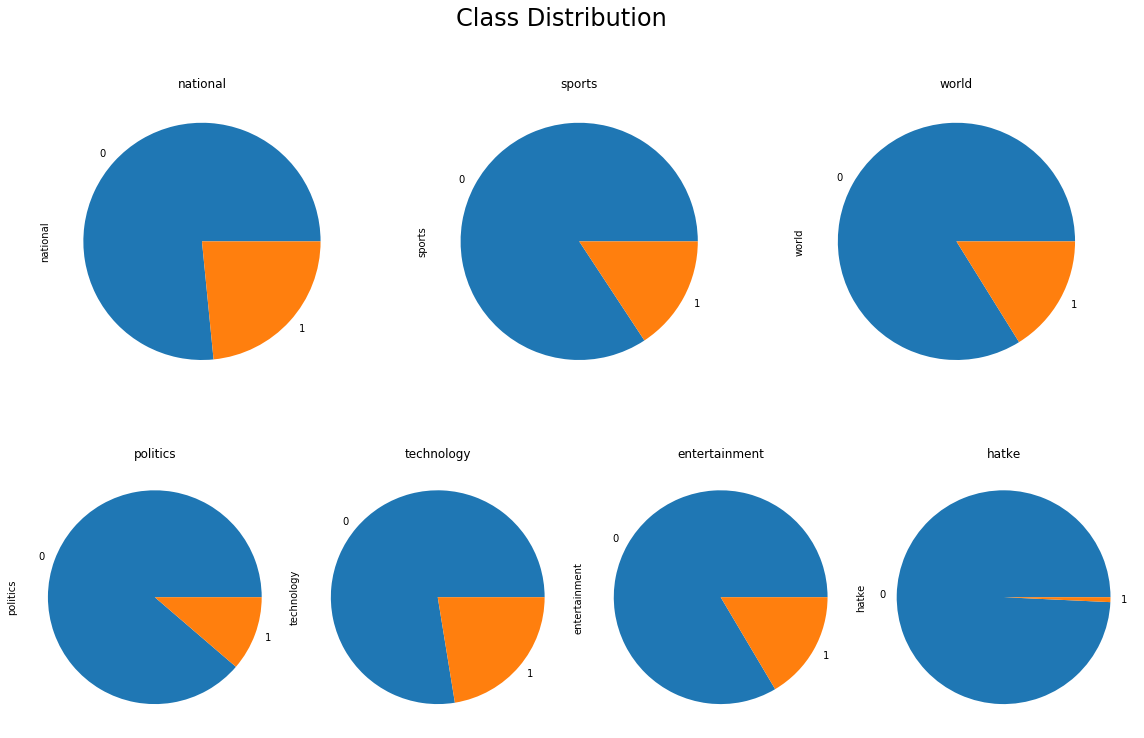

In [3]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Class Distribution', fontsize=24)
ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3))    
    
for i in range(7):
    data.iloc[:, i+1].value_counts().plot.pie(ax=ax[i], title=data.columns[i+1])

## Visualizing most common words

In [4]:
labels = data.columns[1:]

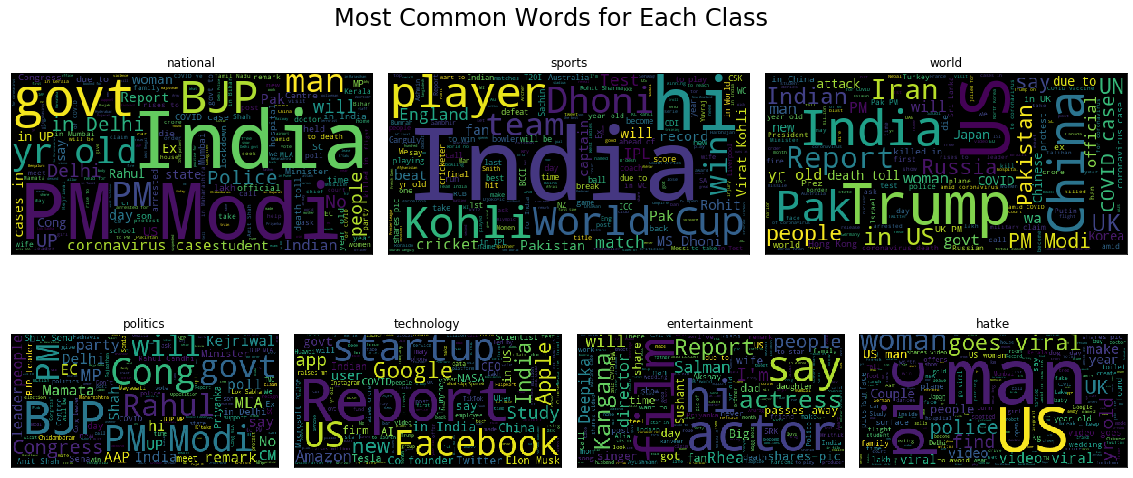

In [5]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Most Common Words for Each Class', fontsize=24)

ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3))  
    
for i, col in enumerate(labels):
    ax[i].imshow(WordCloud().generate_from_text(' '.join(data[data[col] == 1]['news'].values)))
    ax[i].set_title(col)
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

## Text Cleaning

In [6]:
import sys
sys.path.append('../')

from utils.text import TextCleaner

In [7]:
cleaner = TextCleaner()
data['news_clean'] = cleaner.fit_transform(data['news'].values)
data.head()

,news,national,sports,world,politics,technology,entertainment,hatke,news_clean
0,"""Modi Modi yes papa,"" Rashtriya Janata Dal pens poem on PM Modi",0,0,0,1,0,0,0,modi modi yes papa rashtriya janata dal pen poem modi
1,"""Powerphone"" Galaxy Note20 Ultra 5G to launch at Powerfest on 25 Aug",0,0,0,0,1,0,0,powerphone galaxy note ultra launch powerfest aug
2,"""Powerphones"" - Samsung Galaxy Note20 | 20 Ultra 5G launched in India",0,0,0,0,1,0,0,powerphones samsung galaxy note ultra launched india
3,#ACKOCatchTheLogo contest starts tomorrow,0,0,0,0,0,0,0,contest start tomorrow
4,"#AyodhyaVerdict becomes world's top Twitter trend with over 630,000 tweets",1,0,1,0,1,0,0,ayodhyaverdict becomes world top twitter trend tweet


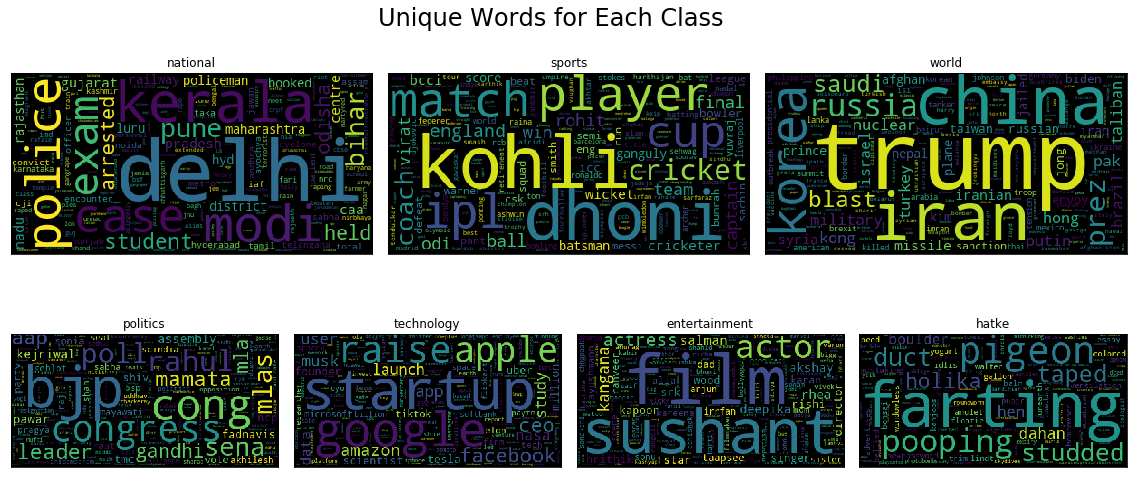

In [8]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Unique Words for Each Class', fontsize=24)

ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3)) 
    
for i, col in enumerate(labels):
    u = Counter(' '.join(data[data[col] == 0]['news_clean'].values).split())
    a = Counter(' '.join(data[data[col] == 1]['news_clean'].values).split())
    ax[i].imshow(WordCloud().generate_from_frequencies(a-u))
    ax[i].set_title(col)
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

## Saving the Data

In [9]:
data['news_clean'].to_csv('../data/X2.csv', index=False)
data.iloc[:, 1:8].to_csv('../data/y2.csv', index=False)